In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mood.representations import MOOD_REPRESENTATIONS

In [110]:
path = "gs://experiments-output/mood-v2/results/dataframes/compare_splits/20221201/splits.csv"

In [111]:
df = pd.read_csv(path)

/home/cas/mambaforge/envs/mood_v2/lib/python3.10/site-packages/google/auth/_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


<AxesSubplot: xlabel='split', ylabel='rank'>

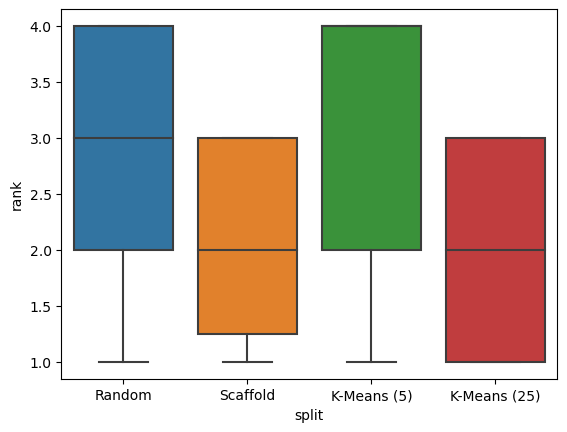

In [112]:
sns.boxplot(data=df, x="split", y="rank")

In [113]:
denominator = df[df["best"]].groupby("representation").count().iloc[:, 0].unique()
assert len(denominator) == 1
denominator = denominator[0]

In [114]:
counts = df[df["best"]].value_counts(["representation", "split"]).reset_index()
counts = counts.pivot(index="representation", columns="split", values=0)
counts = counts / denominator
counts = counts.reindex(MOOD_REPRESENTATIONS)

In [115]:
cmap = sns.color_palette(desat=0.75)
cmap

[(0.19460784313725488, 0.45343137254901944, 0.632843137254902),
 (0.8818627450980391, 0.5053921568627451, 0.17303921568627467),
 (0.22941176470588232, 0.5705882352941177, 0.22941176470588232),
 (0.7534313725490196, 0.23872549019607847, 0.24166666666666664),
 (0.5784313725490194, 0.446078431372549, 0.6990196078431372),
 (0.5171568627450981, 0.3583333333333334, 0.3259803921568628),
 (0.8372549019607844, 0.5196078431372548, 0.7401960784313724),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.6622549019607844, 0.6651960784313725, 0.2093137254901961),
 (0.180392156862745, 0.6715686274509803, 0.7215686274509805)]

Text(0.5, 0, 'Representation')

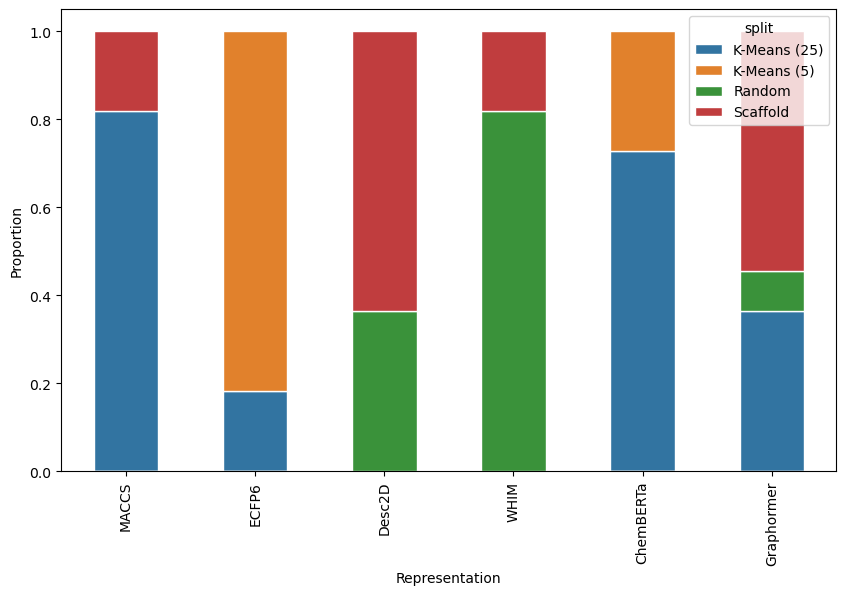

In [126]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = [cmap[i] for i in range(df["split"].nunique())]
ax = counts.plot(kind="bar", stacked=True, ax=ax, color=colors, edgecolor="white", linewidth=1)
ax.set_ylabel("Proportion")
ax.set_xlabel("Representation")

The End. 